## Assignment #3

* Release date: 2021/10/26 Tue
* Due date: **2021/11/02 Tue 23:59** (will not accept late submission)
* Submittion format: notebook file which can be executed in Colab environment
* Weighting: 10% (total 100 pts)

* We will train CNN using `dogs_vs_cats_subset.zip` distributed in the class.

> ### (5pts) Prepare the dataset

* Place the unzipped files in some directory on your Colab instance.
* Count the number of JPEG files in `train`, `validation`, and `test` folders.

In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

import os
from pathlib import Path

# # folder 변수에 구글드라이브에 프로젝트를 저장한 디렉토리를 입력하세요!
# # My Drive 밑에 저장했다면 그대로 두시면 됩니다.
folder = ""
project_dir = "assignment3_16102284"

base_path = Path("/content/drive/My Drive/")
project_path = base_path / folder / project_dir
os.chdir(project_path)
for x in list(project_path.glob("*")):
    if x.is_dir():
        dir_name = str(x.relative_to(project_path))
        os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f"Current directory location: {os.getcwd()}")

Mounted at /content/drive
Current directory location: /content/drive/My Drive/assignment3_16102284


In [2]:
import zipfile
from glob import glob
import numpy as np

current_path = Path().absolute()
data_path = current_path / "data"
print("Current directory location: {}".format(current_path))
if (data_path / "my_cat_dog").exists():
    print(" 'data/my_cat_dog' folder is already decompressed. Check it out!")
else:
    with zipfile.ZipFile(str(data_path / "my_cat_dog.zip"), "r") as zip_ref:
        zip_ref.extractall(str(data_path / "my_cat_dog"))
    print("Done!")

Current directory location: /content/drive/My Drive/assignment3_16102284
 'data/my_cat_dog' folder is already decompressed. Check it out!


In [3]:
import zipfile, os, shutil

train_cats_dir = os.path.join(data_path, 'my_cat_dog/train/cat')
train_dogs_dir = os.path.join(data_path, 'my_cat_dog/train/dog')

validation_cats_dir = os.path.join(data_path, 'my_cat_dog/val/cat')
validation_dogs_dir = os.path.join(data_path, 'my_cat_dog/val/dog')

test_cats_dir = os.path.join(data_path, 'my_cat_dog/test/cat')
test_dogs_dir = os.path.join(data_path, 'my_cat_dog/test/dog')

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 1000
total test dog images: 1000


> ### (20pts) Build a baseline model

* **(10pts)** Use VGG16 model as a baseline model.
  * You can use `tensorflow.keras.applications` module to get the VGG16 architecture.
  * You should customize the VGG16 model to deal with a given task, i.e., two class classification.
  * We will use 128*128 resized images as inputs to the model and randomly initialized model parameters.
  * Place **two output nodes** at the output layer.
  * Others not specified should be chosen yourself.

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import zipfile, os, shutil


IMG_SIZE = 128
batch_size = 20
num_epochs = 50


current_path = Path().absolute()
data_path = current_path / "data"
data_dir = './data/my_cat_dog'  # The directory path of the decompressed dataset.

PATH = data_dir

In [5]:
def create_model():
  
  conv_base = tf.keras.applications.VGG16(weights='imagenet',
                                        include_top=False,
                                        input_shape=(IMG_SIZE, IMG_SIZE, 3))
  conv_base.trainable = False
  
  model = tf.keras.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())

  model.add(layers.Dense(32, activation='relu',kernel_initializer='random_uniform', bias_initializer='zeros')) 
  model.add(layers.Dense(2, activation='softmax'))

  return model


model_base = create_model()
# training variable 확인
for var in model_base.trainable_variables:
    print(var.name)

58900480/58889256 [==============================] - 1s 0us/step
dense/kernel:0
dense/bias:0
dense_1/kernel:0
dense_1/bias:0


* **(10pts)** How many trainable parameters in the first convolutional layer? Explain how to compute the number of parameters.

In [6]:
conv_base = tf.keras.applications.VGG16(weights=None,
                                        include_top=False,
                                        input_shape=(IMG_SIZE, IMG_SIZE, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

## Answer: 
## parameter fomular  = (kernel * kernel * channel + 1) * Filter
## All vgg16's Conv layers are 3x3 in size.

block1_conv1 : (3 * 3 * 3 + 1) * 64 = 1,792

block2_conv1 : (3 * 3 * 64 + 1) * 128 = 73,856

block3_conv1 : (3 * 3 * 128 + 1) * 256 = 295,168

block4_conv1 : (3 * 3 * 256 + 1) * 512 = 1,180,160

block5_conv1 : (3 * 3 * 512 + 1 ) * 512 = 2,359,808

> ### (10pts) Train a baseline model 

  * Currently, the data is stored as JPEG files. So we need the following steps:
    * Read the files.
    * Decode the JPEG content to RGB grids of pixels.
    * Convert these into floating-point tensors.
    * Scaling the data to be in a range of [0,1].
    
  * Set `batch_size` to 20.
  * Train the network for 50 epochs. It may consume some time. Note that you should set `steps_per_epoch` and `validation_steps` properly so that a particular data is processed once during a single epoch.
  * **Use Adam optimizer to train the model**. You may need to find hyperparameters (e.g., learning rate) to make the optimizer work.
  * Here, you don't need to apply any regularization methods. 

In [7]:
# normalizing the images to [0, 1]
def normalize(input_image):   
    input_image = (input_image / 255)    
    return input_image

def add_label(image_file, label):
    return image_file, label

def load_image_train(image_file, label):

    input_image, label = load(image_file, label)
    input_image = tf.image.resize(input_image, (128, 128))
    input_image = normalize(input_image)

    return input_image, label

def load_image_val_and_test(image_file, label):

    input_image, label = load(image_file, label)
    input_image = tf.image.resize(input_image, (128, 128))
    input_image = normalize(input_image)

    return input_image, label

def load(image_file, label):
    
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)
    image = tf.cast(image, tf.float32)

    return image, label

def resize(input_image, height, width):
    input_image = tf.image.resize(input_image, (height, width))
    return input_image

# The folder name in the train folder is indicated by list.
# In other words, the name of the category to be used for learning is indicated as a list.
folder_list = [f for f in os.listdir(os.path.join(PATH, 'train')) if not f.startswith('.')]

train_dataset = tf.data.Dataset.list_files(                            
    os.path.join(PATH, 'train', folder_list[0], '*.jpg'))
train_dataset = train_dataset.map(lambda x: add_label(x, 0))          
for label, category_name in enumerate(folder_list[1:], 1):            
    temp_dataset = tf.data.Dataset.list_files(                        
        os.path.join(PATH, 'train', category_name, '*.jpg'))
    temp_dataset = temp_dataset.map(lambda x: add_label(x, label))    
    train_dataset = train_dataset.concatenate(temp_dataset)            

N = BUFFER_SIZE = len(list(train_dataset)) # number of samples in train_dataset
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=16)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat()

folder_list = [f for f in os.listdir(os.path.join(PATH, 'val')) if not f.startswith('.')]
val_dataset = tf.data.Dataset.list_files(os.path.join(PATH, 'val', folder_list[0], '*.jpg'))
val_dataset = val_dataset.map(lambda x: add_label(x, 0))
for label, category_name in enumerate(folder_list[1:], 1):
    temp_dataset = tf.data.Dataset.list_files(os.path.join(PATH, 'val', category_name, '*.jpg'))
    temp_dataset = temp_dataset.map(lambda x: add_label(x, label))
    val_dataset = val_dataset.concatenate(temp_dataset)

val_dataset = val_dataset.map(load_image_val_and_test)
val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.repeat()

folder_list = [f for f in os.listdir(os.path.join(PATH, 'test')) if not f.startswith('.')]
test_dataset = tf.data.Dataset.list_files(os.path.join(PATH, 'test', folder_list[0], '*.jpg'))
test_dataset = test_dataset.map(lambda x: add_label(x, 0))
for label, category_name in enumerate(folder_list[1:], 1):
    temp_dataset = tf.data.Dataset.list_files(os.path.join(PATH, 'test', category_name, '*.jpg'))
    temp_dataset = temp_dataset.map(lambda x: add_label(x, label))
    test_dataset = test_dataset.concatenate(temp_dataset)

test_dataset = test_dataset.map(load_image_val_and_test)
test_dataset = test_dataset.shuffle(BUFFER_SIZE)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.repeat()

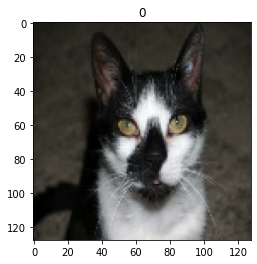

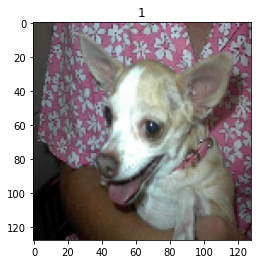

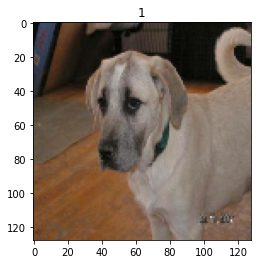

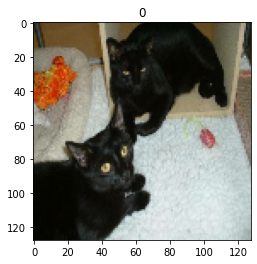

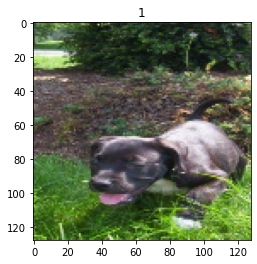

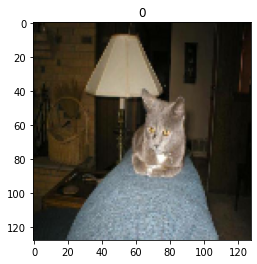

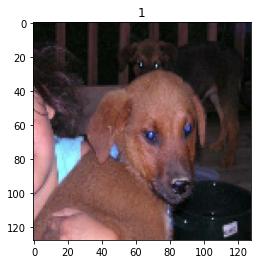

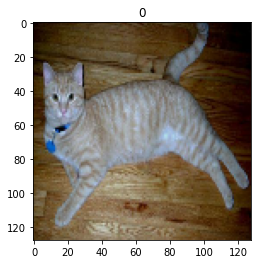

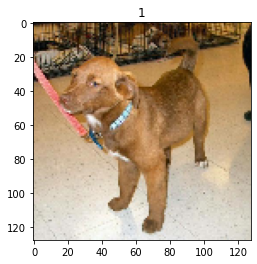

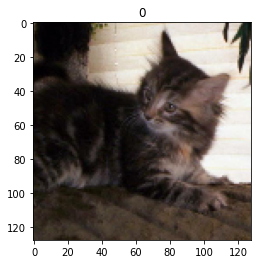

In [8]:
for images, labels in train_dataset.take(1):
    for j in range(10):
        plt.figure()
        plt.imshow(images[j])
        plt.title(labels[j].numpy())
        plt.show()

In [9]:
from glob import glob

checkpoint_path = "./train/exp_cnn/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, save_freq='epoch',  verbose=1)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                              patience=7)        
                             

train_len = len(glob(os.path.join(PATH, 'train', folder_list[0], '*.jpg'))) * 2
val_len = len(glob(os.path.join(PATH, 'val', folder_list[0], '*.jpg'))) * 2
test_len = len(glob(os.path.join(PATH, 'test', folder_list[0], '*.jpg'))) * 2


model_base.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

history_base = model_base.fit(train_dataset,
          steps_per_epoch = train_len / batch_size,
          validation_data=val_dataset, 
          validation_steps= val_len / batch_size,          
          epochs=num_epochs,
          callbacks= [cp_callback, earlystopping])

latest_base = tf.train.latest_checkpoint(checkpoint_dir)

Epoch 1/50
100/100 [==============================] - 262s 2s/step - loss: 0.4086 - accuracy: 0.8155 - val_loss: 0.3650 - val_accuracy: 0.8440

Epoch 00001: saving model to ./train/exp_cnn/cp-0001.ckpt
Epoch 2/50
100/100 [==============================] - 12s 122ms/step - loss: 0.2148 - accuracy: 0.9080 - val_loss: 0.2886 - val_accuracy: 0.8740

Epoch 00002: saving model to ./train/exp_cnn/cp-0002.ckpt
Epoch 3/50
100/100 [==============================] - 12s 120ms/step - loss: 0.1509 - accuracy: 0.9395 - val_loss: 0.2864 - val_accuracy: 0.8770

Epoch 00003: saving model to ./train/exp_cnn/cp-0003.ckpt
Epoch 4/50
100/100 [==============================] - 12s 121ms/step - loss: 0.0963 - accuracy: 0.9665 - val_loss: 0.3105 - val_accuracy: 0.8760

Epoch 00004: saving model to ./train/exp_cnn/cp-0004.ckpt
Epoch 5/50
100/100 [==============================] - 12s 120ms/step - loss: 0.0632 - accuracy: 0.9800 - val_loss: 0.3055 - val_accuracy: 0.8750

Epoch 00005: saving model to ./train/exp

> ### (5pts) Plot some curves
* Plot accuracies and losses on training and validation datasets, respectively.

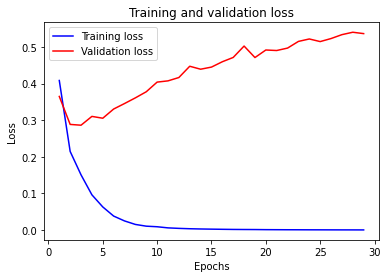

In [10]:
loss_values = history_base.history['loss']
val_loss_values = history_base.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss') 
plt.plot(epochs, val_loss_values, 'r', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

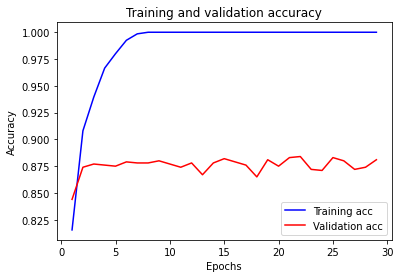

In [11]:
acc_values = history_base.history['accuracy']
val_acc_values = history_base.history['val_accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'b', label='Training acc') 
plt.plot(epochs, val_acc_values, 'r', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend()

plt.show()



> ### (50pts) Improve the baseline model
* Try at least three strategies to improve the validation performance of the baseline model.
* You should examine that the performance is indeed improved as you employ your strategies. In other words, you should show that (accuracy with strategy 1 <= accuracy with strategy 1 and 2 <= accuracy with strategy 1, 2, and 3).

>> ### (15pts) Trial 1: something

### Trial1 : Image Agumentation

In [12]:
def load_image_train_trial_1_1(image_file, label):

    ## 코드 시작 ##
    input_image, label = load(image_file, label)
    input_image = tf.image.resize(input_image, (150, 150))
    # randomly rotation
    input_image = tf.image.rot90(input_image, k = np.random.randint(0, 3))
    # randomly mirroring
    input_image = tf.image.random_flip_left_right(input_image)
    # randomly cropping to 128 x 128 x 3
    input_image =  tf.image.random_crop(input_image,  (128,128,3))
    ## 코드 종료 ##
    input_image = normalize(input_image)
    ## 코드 종료 ##

    return input_image, label

def load_image_train_trial_1_2(image_file, label):

    input_image, label = load(image_file, label)
    input_image = tf.image.resize(input_image, (128, 128))
    input_image = normalize(input_image)

    return input_image, label    

def load_image_val_and_test_trial_1(image_file, label):

    ## 코드 시작 ##
    input_image, label = load(image_file, label)
    input_image = tf.image.resize(input_image, (128, 128))
    input_image = normalize(input_image)
    ## 코드 종료 ##

    return input_image, label



In [13]:

folder_list = [f for f in os.listdir(os.path.join(PATH, 'train')) if not f.startswith('.')]

train_dataset_basic = tf.data.Dataset.list_files(                           
    os.path.join(PATH, 'train', folder_list[0], '*.jpg'))
train_dataset_basic = train_dataset_basic.map(lambda x: add_label(x, 0))        
for label, category_name in enumerate(folder_list[1:], 1):          
    temp_dataset = tf.data.Dataset.list_files(                        
        os.path.join(PATH, 'train', category_name, '*.jpg'))
    temp_dataset = temp_dataset.map(lambda x: add_label(x, label))    
    train_dataset_basic = train_dataset_basic.concatenate(temp_dataset)           

N = BUFFER_SIZE = len(list(train_dataset_basic)) 
train_dataset_basic = train_dataset_basic.shuffle(BUFFER_SIZE)
train_dataset_basic = train_dataset_basic.map(load_image_train_trial_1_2,
                                  num_parallel_calls=16)
train_dataset_basic = train_dataset_basic.batch(batch_size)
train_dataset_basic = train_dataset_basic.repeat()

train_dataset_change = tf.data.Dataset.list_files(                           
    os.path.join(PATH, 'train', folder_list[0], '*.jpg'))
train_dataset_change = train_dataset_change.map(lambda x: add_label(x, 0))         
for label, category_name in enumerate(folder_list[1:], 1):            
    temp_dataset = tf.data.Dataset.list_files(                         
        os.path.join(PATH, 'train', category_name, '*.jpg'))
    temp_dataset = temp_dataset.map(lambda x: add_label(x, label))    
    train_dataset_change = train_dataset_change.concatenate(temp_dataset)            

N = BUFFER_SIZE = len(list(train_dataset_change)) 
train_dataset_change = train_dataset_change.shuffle(BUFFER_SIZE)
train_dataset_change = train_dataset_change.map(load_image_train_trial_1_2,
                                  num_parallel_calls=16)
train_dataset_change = train_dataset_change.batch(batch_size)
train_dataset_change = train_dataset_change.repeat()

train_dataset = train_dataset_basic.concatenate(train_dataset_change)

folder_list = [f for f in os.listdir(os.path.join(PATH, 'val')) if not f.startswith('.')]
val_dataset = tf.data.Dataset.list_files(os.path.join(PATH, 'val', folder_list[0], '*.jpg'))
val_dataset = val_dataset.map(lambda x: add_label(x, 0))
for label, category_name in enumerate(folder_list[1:], 1):
    temp_dataset = tf.data.Dataset.list_files(os.path.join(PATH, 'val', category_name, '*.jpg'))
    temp_dataset = temp_dataset.map(lambda x: add_label(x, label))
    val_dataset = val_dataset.concatenate(temp_dataset)

val_dataset = val_dataset.map(load_image_val_and_test_trial_1)
val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.repeat()

folder_list = [f for f in os.listdir(os.path.join(PATH, 'test')) if not f.startswith('.')]
test_dataset = tf.data.Dataset.list_files(os.path.join(PATH, 'test', folder_list[0], '*.jpg'))
test_dataset = test_dataset.map(lambda x: add_label(x, 0))
for label, category_name in enumerate(folder_list[1:], 1):
    temp_dataset = tf.data.Dataset.list_files(os.path.join(PATH, 'test', category_name, '*.jpg'))
    temp_dataset = temp_dataset.map(lambda x: add_label(x, label))
    test_dataset = test_dataset.concatenate(temp_dataset)

test_dataset = test_dataset.map(load_image_val_and_test_trial_1)
test_dataset = test_dataset.shuffle(BUFFER_SIZE)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.repeat()

In [14]:
checkpoint_path = "./train/exp_cnn/trial1_cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, save_freq='epoch',  verbose=1)

train_len = len(glob(os.path.join(PATH, 'train', folder_list[0], '*.jpg'))) * 4
val_len = len(glob(os.path.join(PATH, 'val', folder_list[0], '*.jpg'))) * 2
test_len = len(glob(os.path.join(PATH, 'test', folder_list[0], '*.jpg'))) * 2

model_trial1 = create_model()

model_trial1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

history_trial1 = model_trial1.fit(train_dataset,
          steps_per_epoch = train_len / batch_size,
          validation_data=val_dataset, 
          validation_steps= val_len / batch_size,          
          epochs=num_epochs,
          callbacks= [cp_callback, earlystopping])



latest_trial1 = tf.train.latest_checkpoint(checkpoint_dir)


Epoch 1/50
200/200 [==============================] - 21s 102ms/step - loss: 0.3568 - accuracy: 0.8410 - val_loss: 0.2843 - val_accuracy: 0.8760

Epoch 00001: saving model to ./train/exp_cnn/trial1_cp-0001.ckpt
Epoch 2/50
200/200 [==============================] - 21s 105ms/step - loss: 0.1792 - accuracy: 0.9370 - val_loss: 0.2672 - val_accuracy: 0.8970

Epoch 00002: saving model to ./train/exp_cnn/trial1_cp-0002.ckpt
Epoch 3/50
200/200 [==============================] - 20s 100ms/step - loss: 0.1030 - accuracy: 0.9665 - val_loss: 0.2896 - val_accuracy: 0.8870

Epoch 00003: saving model to ./train/exp_cnn/trial1_cp-0003.ckpt
Epoch 4/50
200/200 [==============================] - 20s 101ms/step - loss: 0.0469 - accuracy: 0.9915 - val_loss: 0.3389 - val_accuracy: 0.8810

Epoch 00004: saving model to ./train/exp_cnn/trial1_cp-0004.ckpt
Epoch 5/50
200/200 [==============================] - 21s 104ms/step - loss: 0.0256 - accuracy: 0.9967 - val_loss: 0.3752 - val_accuracy: 0.8720

Epoch 0000

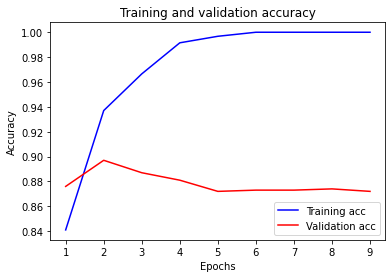

In [22]:
acc_values = history_trial1.history['accuracy']
val_acc_values = history_trial1.history['val_accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'b', label='Training acc') 
plt.plot(epochs, val_acc_values, 'r', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend()

plt.show()

In [16]:
print(sum(val_acc_values)/len(val_acc_values))

0.8783333367771573


>> ### (15pts) Trial 2: trial1 + something

Add drop out and r1 regulization and change weight initialization and load imagenet pretrained weight

In [17]:
from tensorflow.keras import regularizers

checkpoint_path = "./train/exp_cnn/trial2_cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, save_freq='epoch',  verbose=1)


conv_base = tf.keras.applications.VGG16(weights='imagenet',
                                      include_top=False,
                                      input_shape=(128, 128, 3))
conv_base.trainable = False
  
model_trial2 = tf.keras.Sequential()
model_trial2.add(conv_base)
model_trial2.add(layers.Flatten())

model_trial2.add(layers.Dropout(0.5)) # add dropout
model_trial2.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001),kernel_initializer='he_normal'))
model_trial2.add(layers.Dense(2, activation='softmax'))

print(model_trial2.summary())

model_trial2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

history_trial2 = model_trial2.fit(train_dataset,
          steps_per_epoch = train_len / batch_size,
          validation_data=val_dataset, 
          validation_steps= val_len / batch_size,          
          epochs=num_epochs,
          callbacks= [cp_callback, earlystopping])


latest_trial2 = tf.train.latest_checkpoint(checkpoint_dir)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                262176    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 14,976,930
Trainable params: 262,242
Non-trainable params: 14,714,688
_________________________________________________________________
None
Epoch 1/50
200/200 [==============================] - 22s 105ms/step - loss: 1.3100 - accuracy: 0

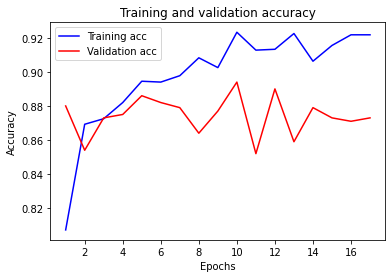

In [21]:
acc_values = history_trial2.history['accuracy']
val_acc_values = history_trial2.history['val_accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'b', label='Training acc') 
plt.plot(epochs, val_acc_values, 'r', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend()

plt.show()

In [19]:
print(sum(val_acc_values)/len(val_acc_values))

0.8741764741785386


>> ### (20pts) Trial 3: trial1 + trial2 + something

Add layer and adjust the trainig flag (True, False) to train only after 'conv_block5'.

In [28]:
checkpoint_path = "./train/exp_cnn/trial3_cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only = True, save_freq='epoch',  verbose=1)


conv_base = tf.keras.applications.VGG16(weights='imagenet',
                                      include_top=False,
                                      input_shape=(128, 128, 3))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
  
model_trial3 = tf.keras.Sequential()
model_trial3.add(conv_base)
model_trial3.add(layers.Flatten())

model_trial3.add(layers.Dropout(0.5)) # add dropout
model_trial3.add(layers.Dense(128, activation='relu',kernel_initializer='he_normal'))
model_trial3.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001),kernel_initializer='he_normal'))
model_trial3.add(layers.Dense(2, activation='softmax'))

print(model_trial3.summary())
for var in model_trial3.trainable_variables:
    print(var.name)

model_trial3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

history_trial3 = model_trial3.fit(train_dataset,
          steps_per_epoch = train_len / batch_size,
          validation_data=val_dataset, 
          validation_steps= val_len / batch_size,          
          epochs=num_epochs,
          callbacks= [cp_callback, earlystopping])

latest_trial3 = tf.train.latest_checkpoint(checkpoint_dir)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_25 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 66        
Total params: 15,767,586
Trainable params: 8,132,322
Non-trainable params: 7,635,264
___________________________________

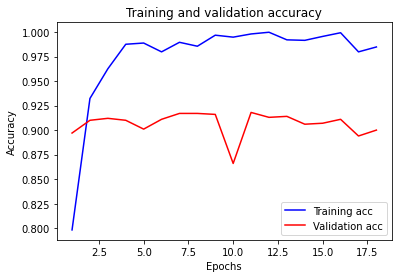

In [29]:
acc_values = history_trial3.history['accuracy']
val_acc_values = history_trial3.history['val_accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'b', label='Training acc') 
plt.plot(epochs, val_acc_values, 'r', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend()

plt.show()

In [30]:
print(sum(val_acc_values)/len(val_acc_values))

0.9066666695806715


> ### (10pts) Compare the final performance of your models on the test dataset
  * Examine the final performance of the baseline, trial1, trial2, and trial3 models.
  * Verify the performance is improved as you apply some regularization methods. If not, discuss why.


In [37]:
model_base_test = create_model()
for images, labels in train_dataset.take(1):
    outputs = model_base_test(images, training=False)

model_base_test.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])    

model_base_test.load_weights(latest_base)

results_model_base_test = model_base_test.evaluate(test_dataset, steps=test_len/batch_size)

100/100 [==============================] - 14s 79ms/step - loss: 0.5531 - accuracy: 0.8665


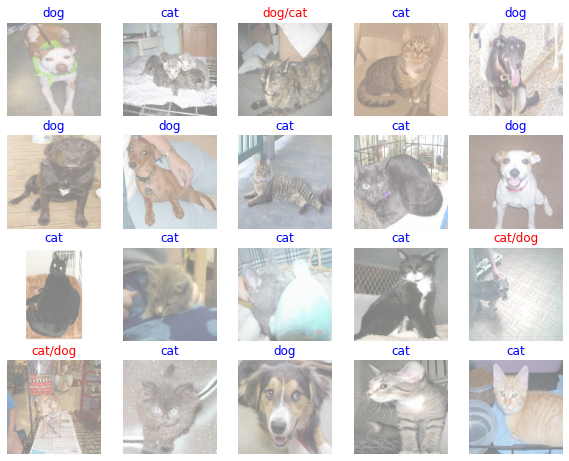

In [32]:
test_batch_size = 25

for images, labels in test_dataset.take(1):
    predictions = model_base_test(images)

images = images[:test_batch_size]
labels = labels[:test_batch_size]
predictions = predictions[:test_batch_size]

labels_map = {0: 'cat', 1: 'dog'}

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(images, labels, predictions)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred.numpy()) == py.numpy():
        p.set_title("{}".format(labels_map[py.numpy()]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred.numpy())],
                                   labels_map[py.numpy()]), color='red')
    p.imshow(px.numpy()*0.5+0.5)
    p.axis('off')

In [38]:
model_trial1_test = create_model()
for images, labels in train_dataset.take(1):
    outputs = model_trial1_test(images, training=False)

model_trial1_test.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])    

model_trial1_test.load_weights(latest_trial1)

results_model_trial1_test = model_trial1_test.evaluate(test_dataset, steps=test_len/batch_size)

100/100 [==============================] - 14s 79ms/step - loss: 0.4517 - accuracy: 0.8725


In [34]:
conv_base = tf.keras.applications.VGG16(weights='imagenet',
                                      include_top=False,
                                      input_shape=(128, 128, 3))
conv_base.trainable = False
  
model_trial2_test = tf.keras.Sequential()
model_trial2_test.add(conv_base)
model_trial2_test.add(layers.Flatten())

model_trial2_test.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001),kernel_initializer='he_normal'))
model_trial2_test.add(layers.Dense(2, activation='softmax'))

for images, labels in train_dataset.take(1):
    outputs = model_trial2_test(images, training=False)

model_trial2_test.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])    

model_trial2_test.load_weights(latest_trial2)

results_model_trial2_test = model_trial2_test.evaluate(test_dataset, steps=test_len/batch_size)



Two checkpoint references resolved to different objects (<keras.layers.core.Dense object at 0x7f04c4dc5110> and <keras.layers.core.Dense object at 0x7f04c70d6dd0>).
100/100 [==============================] - 14s 78ms/step - loss: 0.5218 - accuracy: 0.8635


In [35]:
conv_base = tf.keras.applications.VGG16(weights='imagenet',
                                      include_top=False,
                                      input_shape=(128, 128, 3))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
  
model_trial3_test = tf.keras.Sequential()
model_trial3_test.add(conv_base)
model_trial3_test.add(layers.Flatten())

model_trial3_test.add(layers.Dense(128, activation='relu',kernel_initializer='he_normal'))
model_trial3_test.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001),kernel_initializer='he_normal'))
model_trial3_test.add(layers.Dense(2, activation='softmax'))

for images, labels in train_dataset.take(1):
    outputs = model_trial3_test(images, training=False)

model_trial3_test.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])    

model_trial3_test.load_weights(latest_trial3)

results_model_trial3_test = model_trial3_test.evaluate(test_dataset, steps=test_len/batch_size)



Two checkpoint references resolved to different objects (<keras.layers.core.Dense object at 0x7f04c4cf79d0> and <keras.layers.core.Dense object at 0x7f04c4d7e910>).

Two checkpoint references resolved to different objects (<keras.layers.core.Dense object at 0x7f04c4d7e910> and <keras.layers.core.Dense object at 0x7f04c4d5d710>).
100/100 [==============================] - 14s 79ms/step - loss: 0.5420 - accuracy: 0.8990


In [39]:
print('Base test score : ' , round(results_model_base_test[1],4))
print('Trial1 test score : ' , round(results_model_trial1_test[1],4))
print('Trial2 test score : ' , round(results_model_trial2_test[1],4))
print('Trial3 test score : ' , round(results_model_trial3_test[1],4))

Base test score :  0.8665
Trial1 test score :  0.8725
Trial2 test score :  0.8635
Trial3 test score :  0.899


Trial1 graph was judged as overfitting on the graph. However, it is assumed that these results actually rose slightly due to the leak of the validation data, but the test results resulted in a lower value. The rest of the attempts, data augment and additional layer learning, are believed to have successfully constructed a robust better model.